In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
def questoes_ids():
    questao_base = 'TX_RESP_Q{}'
    for i in range(1, 63):
        yield questao_base.format(str(i).zfill(3))
        

def codificar_questoes(questionario_pd):
    questionario_tratado_pd = questionario_pd.copy()
    for questao in questoes_ids():
        questionario_tratado_pd[questao] = questionario_pd[questao].map({'A': 3, 'B': 2, 'C': 1, 'D': 0}).fillna(-1)
    
    return questionario_tratado_pd


def limpar_scores(questionario_pd):
    questionario_tratado_pd = questionario_pd.copy()
    ids_scores = ['MEDIA_LP', 'MEDIA_MT']
    
    for id_score in ids_scores:
        questionario_tratado_pd[id_score] = questionario_pd[id_score].str.strip().str.replace(',', '.').str.replace('^$', '-1').astype(float)
    
    return questionario_tratado_pd

In [9]:
raw_data = pd.read_csv('/Users/bonifacio/projects/desafio-dados-2016/dados/microdados_saeb_2011/Dados/TS_QUEST_ALUNO.csv', sep=';')

/Users/bonifacio/projects/desafio-dados-2016/venv/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
quest_resultado_df = pd.read_csv('/Users/bonifacio/projects/desafio-dados-2016/dados/microdados_saeb_2011/Dados/TS_RESULTADO_ALUNO.csv', sep=';')

/Users/bonifacio/projects/desafio-dados-2016/venv/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
nono_ano_df = raw_data[raw_data['ID_SERIE'] == 9]

In [21]:
cleaned_questions_df = codificar_questoes(nono_ano_df)

In [38]:
non_question_features = cleaned_questions_df.columns[0:15]
cleaned_questions_df = cleaned_questions_df.drop(non_question_features, axis=1)

In [16]:
from sklearn.decomposition import PCA

In [40]:
questions_2d_values = PCA(n_components=2).fit_transform(cleaned_questions_df)

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

In [42]:
import numpy as np

In [67]:
# np.random.permutation(2604238)
questions_2d_sample = questions_2d_values[0:25000, :]

In [70]:
y_interval = np.logical_and(questions_2d_sample[:, 1] > 9, questions_2d_sample[:, 1] < 11)
x_interval = np.logical_and(questions_2d_sample[:, 0] > -15, questions_2d_sample[:, 0] < -10)
da_one = np.logical_and(x_interval, y_interval)
np.nonzero(da_one)

(array([23453]),)

In [76]:
da_one_df = raw_data.iloc[[23453]]

In [78]:
da_one_df.to_csv('da_one_outlier.csv')

In [79]:
pwd()

'/Users/bonifacio/projects/desafio-dados-2016/src'

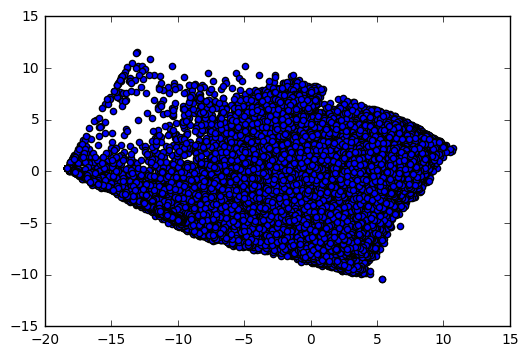

In [75]:
plt.scatter(questions_2d_values[:, 0], questions_2d_values[:, 1])
plt.show()

In [13]:
nono_ano_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2604238 entries, 43 to 5396424
Data columns (total 77 columns):
ID_SAEB               int64
ID_REGIAO             int64
ID_UF                 int64
ID_MUNICIPIO          int64
ID_ESCOLA             int64
ID_DEPENDENCIA_ADM    int64
ID_LOCALIZACAO        int64
ID_CAPITAL            int64
ID_TURMA              int64
ID_TURNO              object
ID_SERIE              int64
ID_ALUNO              int64
IN_SITUACAO_CENSO     int64
IN_PROVA_BRASIL       int64
IN_PREENCHIMENTO      int64
TX_RESP_Q001          object
TX_RESP_Q002          object
TX_RESP_Q003          object
TX_RESP_Q004          object
TX_RESP_Q005          object
TX_RESP_Q006          object
TX_RESP_Q007          object
TX_RESP_Q008          object
TX_RESP_Q009          object
TX_RESP_Q010          object
TX_RESP_Q011          object
TX_RESP_Q012          object
TX_RESP_Q013          object
TX_RESP_Q014          object
TX_RESP_Q015          object
TX_RESP_Q016          object
T